# Introduction
Constraint Satisfaction Problems are the class of problems that be defined using the Variable, Domain and Constraints. As we known problem has an initial state and goal state. Some problems require solution that are sequence of actions. While in some problem final goal state it self a solution. 

For example N- Queen problem where goal of the problem is to place N queen on NxN chess board such that no queen attacks each other. So in such situation the final arrangement is the only solution. 

Whereas in 8 tile puzzle where there 8 tiles in 3x3 grid and those tiles should be arranged in provided sequence from arbitrary initial arrangement. In that kind of problem one can not simply pick and put tile but instead tiles should be moved in specific sequence to reach the goal state.

Similarly to the N-queens problem Sudoku is another puzzle in which final state is only what matters as solution,

So here This Sudoku problem will be implemented using the CSP and solved using the Arc Consistency and back tracking algorithms will be used.






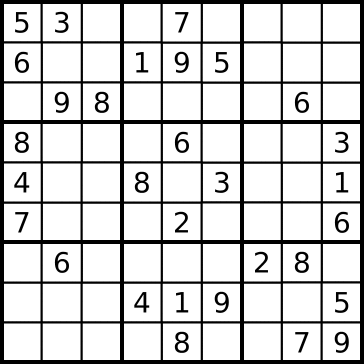


## Constraint Satisfaction Problems

CSP provides a generic structure tha can be used for solving problems where solutions should only satisfy some set of constrains.

CSP consist of following component,

- Variables 
    - To solve a problem, it requires to assig values to some variables. So during the CSP formulation it's important to create a set of variables that would be the solution to problem.

- Domains
    - Value that can be assigned to a variable is restricted by domain of it. Each variable should has it's own domain from which a value can be assigned.
    
- Constrains 
    - Constrains can further restrict the values that variable can take. Constrains can be defined on single variable or between any 2 variable or can be global that includes all the variables.

    - Neighbours
        - Variables that are in constraints
  
- Relations 
   - The set of the numbers in the row (without any repetition in it). With the set of the numbers in the column intersecting with the row (without any repetition in it). 
With the set of numbers in the 3 x 3 square where the row intersects with the column(without any repetition in it).

- Solution 
   - Fully loaded Sudoku that meets all constraints.


Once problem is formulated in those components, various algorithms such as min conflict, backtracking, Arc consistency can be applied to get the desired answers.

If CSP compared to standard problem formulation then, initial state would be variables unassigned. And Goal state would be all variables assigned such that no constraints violates.


## Generic CSP Class

Following class is created for defining generic CSP framework,
This takes list of variables, domain, neighbours, and constraints.
All the solution searching methods works on these variables except for the forward checking algorithm, it was created independently

In [ ]:
# Following generic CSP class, 
# This object is used by the search algorithms
class csp:
    def __init__(self, variables, domain, neighbours, constraint):
        # Store variable
        self.variables = variables
        self.domain = domain
        self.neighbours = neighbours
        self.constraint = constraint
        self.assignment = {}

# Sudoku

Sudoku would be best example problem to understand the CSP. Sudoku is puzzle, with 9x9 grid. where some of the blokes were prefilled with values between 1-9 and player has to fill the blank cells such that the filled values does not repeated in that column and raw as well as in sudoku there are 9 sub 3x3 box so the value which is filled by player should not match with other values in that box also.

Following is the example of one,

    . . 3 | . 2 . | 6 . .
    9 . . | 3 . 5 | . . 1
    . . 1 | 8 . 6 | 4 . .
    ------+-------+------
    . . 8 | 1 . 2 | 9 . .
    7 . . | . . . | . . 8
    . . 6 | 7 . 8 | 2 . .
    ------+-------+------
    . . 2 | 6 . 9 | 5 . .
    8 . . | 2 . 3 | . . 9
    . . 5 | . 1 . | 3 . .

place with '.' in it should be filled by player while satisfying the above mentioned rule.


- Variable
    - In this problem variable could be those empty location (cell location). However we can take all the 81 position as variable and those which are prefilled are also considered as variables but those can not take any other values apart from the one which already given. Following is the sudoku with variable name in it (i.e. location of each cell)
    
             0  1  2 |  3  4  5 |  6  7  8
             9 10 11 | 12 13 14 | 15 16 17
            18 19 20 | 21 22 23 | 24 25 26
            ---------+----------+---------
            27 28 29 | 30 31 32 | 33 34 35 
            36 37 38 | 39 40 41 | 42 43 44
            45 46 47 | 48 49 50 | 51 52 53
            ---------+----------+---------
            54 55 56 | 57 58 59 | 60 61 62
            63 64 65 | 66 67 68 | 69 70 71
            72 73 74 | 75 76 77 | 78 79 80


    
- Domain
    - Domain of each variable is value from 1 to 9, i.e. list [1,2,3,4,5,6,7,8,9]

- Constraint
    - As mentioned earlier that variables that participate in a constraint are called neighbours. According to rule of game, all the values with in those 3x3 box should be different that means all the cell location (variable) are called the neighbour of each other. And the variable in same column and row are also called neighbour of each other. So this way each location as 20 other neighbours. So including variable total 21 location that should not have the same values. 
    
    - So constraint itself is simple one that is neighbour should not take same values. for this sudoku finding the neighbour of each other is shown in later part of the notebook.
    - following is the 4th block and if variable 27 being assigned then all the other variables in that block are neighbours of location 27 or variable.
    
          ---------+
          27 28 29 | 
          36 37 38 | 
          45 46 47 | 
          ---------+-
          
    - and variable for the column are too
    
             0 
             9 
            18 
            ---
            27 
            36 
            45 
            ---
            54 
            63 
            72
    - as well as from that row as well
    
            27 28 29 | 30 31 32 | 33 34 35 



## CSP formulation of Sudoku Puzzle

  •	Initial state:  a particular, partially filled-in, board.

  •	Actions:   Inserting a number onto the board is one of the actions..

  •	State space: The previous state of cells with modified cell number that will be changed according to the constraints.

  •	Goal test: Is to fill all of the cells and avoid any collisions.




# The Algorithms

## Backtracking algorithm

   - Algorithm Steps
        - Step:1 Start with empty Assignment
        - Step:2 Check if assignment is complete or not. If not then continue
        - Step:3 Select the unassigned variable
        - Step:4 For each value of variable from it's domain
            - step: 4.1 Assign value to a variable and check for consistency
            - step: 4.2 if consistence then assign that value to variable and repeated from Step:2 (recursion)
            - step: 4.3 if not consistence then pick new value until all checked. Still not found then return None and recurse back to previous assignment
        - Step:5 Return failure if no solution found
 
## Arc consistency

- Algorithm Steps
    - Step:1 Create pair of neighbours
    - Step:2 repeated until all checked
        - step: 2.1 Pop pair from list/set of neighbours, var1 and var2
        - step: 2.2 Check for every value of var1 from it's domain if there exists any value in var1 domain for that there is no value in domain of var2 to satisfy the constraint remove such values from the domain of var1.
        - step: 2.3 check the domain of var1 if domain is empty then return Failure
        - step: 2.4 Else add another neighbours of var1 in set of par and repeated


## Forward Checking algorithm

- Algorithm Steps
  - Step:1 Start with empty Assignment
  - Step:2 Check if assignment is complete or not. If not then continue
  - Step:3 Exclude all variants that do not meet the constraints before trying them on sudoku
  - Step:4 Select the unassigned variable from the variables left after the elimination
  - Step:5 For each value of variable from it's domain
    - step: 5.1 Assign value to a variable and check for consistency
    - step: 5.2 if consistence then assign that value to variable and repeated from Step:2 (recursion)
    - step: 5.3 if not consistence then pick new value until all checked. Still not found then return None and recurse back to previous assignment
  - Step:6 Return failure if no solution found

 

## SUDOKU class object formulation

To formulate the sudoku grid, a continuous string of 81 character is taken as input here '.' are placed where the values should be placed.

Following string is used to generate sudoku puzzle that shown earlier

**"..3.2.6..9..3.5..1..18.64....81.29..7.......8..67.82....26.95..8..2.3..9..5.1.3.."**

This object can be created by giving grid and constraint as input. Here constraint is designed externally so that different variations of those sudoku can be created.


In [ ]:
# Folloing class defines the sudoku puzzles
class sudoku(csp):
    def __init__(self,grid,constraint):
        """ This will take the sudoku grid in form of string as input
        For example if sudoku is as follows,
        . . 3 | . 2 . | 6 . .
        9 . . | 3 . 5 | . . 1
        . . 1 | 8 . 6 | 4 . .
        ------+-------+------
        . . 8 | 1 . 2 | 9 . .
        7 . . | . . . | . . 8
        . . 6 | 7 . 8 | 2 . .
        ------+-------+------
        . . 2 | 6 . 9 | 5 . .
        8 . . | 2 . 3 | . . 9
        . . 5 | . 1 . | 3 . .
        
        Then it can be given as input as follows:
        
        '..3.2.6..9..3.5..1..18.64....81.29..7.......8..67.82....26.95..8..2.3..9..5.1.3..'
        
        '"""
        if len(grid) != 81:
            print(" Grid should be of 9x9 dimension")
            raise ValueError
        self.grid = grid
    
        self.neighbours = self.get_neighbours() # Get the neighbours
        self.variables = list(self.neighbours.keys()) # Get the list of variables
        self.constraint = constraint(self.neighbours) # Define constraint
        self.domains = {var: [str(i) for i in range(1,10)] if self.grid[var]=='.' else [self.grid[var]] for var in range(9*9)}
        csp.__init__(self,self.variables,self.domains,self.neighbours,self.constraint)
        
        
    # Following function will return the block number
    def find_block(self,k):
        
        
        cell1 = [0,1,2,9,10,11,18,19,20]
        n = 0
        for i in range(3):
            for j in range(3):
                cv = [val+j*3+i*27 for val in cell1]
                if k in cv:
                    return n
                n = n+1
        return n

    # Following cell will return number of column
    def find_column(self,k):
        return k%9


    # Following function will return the row number of given cell
    def find_row(self,k):
        for i in range(9):
            if k <9*(i+1):
                return i
        return None
    # following function is to generate the neighbours of it
    def get_neighbours(self):
        v = {}
        for i in range(81):
            for j in range(81):
                if i not in v.keys():
                    v[i] = []
                    
                if self.find_block(i) == self.find_block(j):
                    ''' If i and j are in same 3x3 block'''
                    v[i].append(j)
                    
                if self.find_column(i) == self.find_column(j):
                    ''' if i and j are in same column'''
                    if j not in v[i]:
                        v[i].append(j)
                        
                if self.find_row(i) == self.find_row(j):
                    
                    ''' if i and j are same column'''
                    if j not in v[i]:
                        v[i].append(j)
                        
            # Remove the the variable it self
            v[i].remove(i)
        return v
    
    def print_solution(self):
        ss = ''.join(list(self.assignment.values()))
        self.print_grid(ss)
        return None
    
    # Following function is used to print the grid
    def print_grid(self,grid=None):
        if grid==None:
            grid = self.grid
        l = 0
        ll = 0
        s = ""
        for i in range(9*9):
            s = s+grid[i]+" "
            if (i+1)%3 == 0 and (i+1)%9 !=0:
                s = s+"| "
            if (i+1)%9 == 0 and ll!=0:
                s=s+"\n"
            if (i+1)%27 == 0 and (i+1)%81 !=0:
                s = s+ "------+-------+------\n"
            l  = 1
            ll = 1
        print(s)
        return None


## SUDOKU Constraint

As mentioned earlier, values assigned to these neighbour should have different value so in this constraint object neighbour is given as input to check the neighbour of the variables which is being assigned.

In [ ]:

# Following is the constraint class for the sodoku csp
class sudoku_constraints:
    def __init__(self,neighbours):
        """ This is stored to check what are the neighbours of the 
        variables"""
        self.neighbours = neighbours
        
    def satisfied(self,var, value, assignment):
        """ Find the neighboirs of a variables and then 
        check if both are having same or different values"""
        for var_a in assignment.keys():
            if var_a in self.neighbours[var]:
                if value == assignment[var_a]:
                    """ Since in sodoku values in 3x3 and same row and column 
                    sould be different if same then return false"""
                    return False
        return True

## Arc consistency implementation

By doing this all the values from domain will be removed that makes problem inconsistence. but problem should have binary constraints.


In [ ]:
# Following is to check the arc consistency
def arc_consistency(csp):
    
    # Get all the paris of neighbours
    pairs = {(var1,var2) for var1 in csp.variables for var2 in csp.neighbours[var1]}
    
    # Check for inconsistan values
    while len(pairs) !=0:
        
        # Take one pair
        var1,var2 = pairs.pop()
        domain_changed = False # Flag to check whether the domain is changed or not
        
        # Create temperary copy of domain 
        tmp_domain = csp.domain[var1].copy()
        tasg = {}  # For temperory assignment
        
        for val1 in tmp_domain:
            # Iterate and chekc of all values
            tasg[var1] = val1
            contraint_violated = True  # Flag to check if there is no value of var2 when var1 = val1 is assigned
            for val2 in csp.domain[var2]:
                if csp.constraint.satisfied(var2,val2,tasg):
                    # if constrains satisfies for any single value that means var1 = val1, does not beak consistency 
                    # between var1 and var2
                    contraint_violated = False
                    break
                    
            if contraint_violated:
                # If no constraint were satisfied by assigning var1 = val1 then remove val1
                # From the domain of var1
                domain_changed = True
                csp.domain[var1].remove(val1)
                
        if domain_changed:
            if len(csp.domain[var1]) == 0:
                # if by removing, there is no value remains in domain then
                # Problem is not consistent hence no solution can be found
                return False
            for vark in csp.neighbours[var1]:
                pairs.add((vark,var1))
    return True

## Implementation of Backtracking

In [ ]:
# Backtracking algorithm
def backtrack(csp,assignment={}):
    if len(assignment) == len(csp.variables):
        """ If all the variables were assigned that means solution is found"""
        return assignment
    #  Pick first unassigned variable
    un_assigned_var = [var for var in csp.variables if var not in assignment.keys()][0]
    
    # Check all the values from domain
    for val in csp.domain[un_assigned_var]:
        tmp_asg = assignment.copy() # Temperary copy for recuresion
        
        if csp.constraint.satisfied(un_assigned_var,val,tmp_asg):
            """ If constraint satisfies then store that assignment and then check for next variable"""
            tmp_asg[un_assigned_var] = val
            result  = backtrack(csp,tmp_asg)
            if result != None:
                # If there is result then return that 
                return result
    # if no result found then return none or failure
    return None

def backtracking(csp):
    
    # Call backtracking
    sol = backtrack(csp,{})
    csp.assignment = sol
    return sol

## Applying and testing algorithm on problem

In [ ]:
easy1 = '..3.2.6..9..3.5..1..18.64....81.29..7.......8..67.82....26.95..8..2.3..9..5.1.3..'
harder1 = '4173698.5.3..........7......2.....6.....8.4......1.......6.3.7.5..2.....1.4......'


### Applying on easy problem

In [ ]:
# Creating sudoku problem object for easy
sudoku_problem = sudoku(easy1,sudoku_constraints)
print("Sudoku Grid: ")
sudoku_problem.print_grid()

Sudoku Grid: 
. . 3 | . 2 . | 6 . . 
9 . . | 3 . 5 | . . 1 
. . 1 | 8 . 6 | 4 . . 
------+-------+------
. . 8 | 1 . 2 | 9 . . 
7 . . | . . . | . . 8 
. . 6 | 7 . 8 | 2 . . 
------+-------+------
. . 2 | 6 . 9 | 5 . . 
8 . . | 2 . 3 | . . 9 
. . 5 | . 1 . | 3 . . 



### Domain Before Applying AC3

In [ ]:
# Check Domains before applying AC3

In [ ]:
sudoku_problem.domain

{0: ['1', '2', '3', '4', '5', '6', '7', '8', '9'],
 1: ['1', '2', '3', '4', '5', '6', '7', '8', '9'],
 2: ['3'],
 3: ['1', '2', '3', '4', '5', '6', '7', '8', '9'],
 4: ['2'],
 5: ['1', '2', '3', '4', '5', '6', '7', '8', '9'],
 6: ['6'],
 7: ['1', '2', '3', '4', '5', '6', '7', '8', '9'],
 8: ['1', '2', '3', '4', '5', '6', '7', '8', '9'],
 9: ['9'],
 10: ['1', '2', '3', '4', '5', '6', '7', '8', '9'],
 11: ['1', '2', '3', '4', '5', '6', '7', '8', '9'],
 12: ['3'],
 13: ['1', '2', '3', '4', '5', '6', '7', '8', '9'],
 14: ['5'],
 15: ['1', '2', '3', '4', '5', '6', '7', '8', '9'],
 16: ['1', '2', '3', '4', '5', '6', '7', '8', '9'],
 17: ['1'],
 18: ['1', '2', '3', '4', '5', '6', '7', '8', '9'],
 19: ['1', '2', '3', '4', '5', '6', '7', '8', '9'],
 20: ['1'],
 21: ['8'],
 22: ['1', '2', '3', '4', '5', '6', '7', '8', '9'],
 23: ['6'],
 24: ['4'],
 25: ['1', '2', '3', '4', '5', '6', '7', '8', '9'],
 26: ['1', '2', '3', '4', '5', '6', '7', '8', '9'],
 27: ['1', '2', '3', '4', '5', '6', '7', '8', 

### Applying Backtracking without AC3 and checking performance

In [ ]:
%time solution = backtracking(sudoku_problem)

CPU times: user 1min 18s, sys: 54.9 ms, total: 1min 18s
Wall time: 1min 18s


### Applying Backtracking+AC3 and checking performance

In [ ]:
%time arc_consistency(sudoku_problem)

Wall time: 0 ns


True

In [ ]:
%time solution = backtracking(sudoku_problem)

Wall time: 15.6 ms


So total time is arround 10-13ms after applying the Backtracking with AC3

In [ ]:
# Solution of the problem
print("Solution of the problem: \n")
sudoku_problem.print_solution()

Solution of the problem: 

4 8 3 | 9 2 1 | 6 5 7 
9 6 7 | 3 4 5 | 8 2 1 
2 5 1 | 8 7 6 | 4 9 3 
------+-------+------
5 4 8 | 1 3 2 | 9 7 6 
7 2 9 | 5 6 4 | 1 3 8 
1 3 6 | 7 9 8 | 2 4 5 
------+-------+------
3 7 2 | 6 8 9 | 5 1 4 
8 1 4 | 2 5 3 | 7 6 9 
6 9 5 | 4 1 7 | 3 8 2 



In [ ]:
# Domain after AC3

In [ ]:
sudoku_problem.domain

{0: ['4'],
 1: ['8'],
 2: ['3'],
 3: ['9'],
 4: ['2'],
 5: ['1'],
 6: ['6'],
 7: ['5'],
 8: ['7'],
 9: ['9'],
 10: ['6'],
 11: ['7'],
 12: ['3'],
 13: ['4'],
 14: ['5'],
 15: ['8'],
 16: ['2'],
 17: ['1'],
 18: ['2'],
 19: ['5'],
 20: ['1'],
 21: ['8'],
 22: ['7'],
 23: ['6'],
 24: ['4'],
 25: ['9'],
 26: ['3'],
 27: ['5'],
 28: ['4'],
 29: ['8'],
 30: ['1'],
 31: ['3'],
 32: ['2'],
 33: ['9'],
 34: ['7'],
 35: ['6'],
 36: ['7'],
 37: ['2'],
 38: ['9'],
 39: ['5'],
 40: ['6'],
 41: ['4'],
 42: ['1'],
 43: ['3'],
 44: ['8'],
 45: ['1'],
 46: ['3'],
 47: ['6'],
 48: ['7'],
 49: ['9'],
 50: ['8'],
 51: ['2'],
 52: ['4'],
 53: ['5'],
 54: ['3'],
 55: ['7'],
 56: ['2'],
 57: ['6'],
 58: ['8'],
 59: ['9'],
 60: ['5'],
 61: ['1'],
 62: ['4'],
 63: ['8'],
 64: ['1'],
 65: ['4'],
 66: ['2'],
 67: ['5'],
 68: ['3'],
 69: ['7'],
 70: ['6'],
 71: ['9'],
 72: ['6'],
 73: ['9'],
 74: ['5'],
 75: ['4'],
 76: ['1'],
 77: ['7'],
 78: ['3'],
 79: ['8'],
 80: ['2']}

### Checking on hard problem

In [ ]:
harder1 = '4173698.5.3..........7......2.....6.....8.4......1.......6.3.7.5..2.....1.4......'
# Creating sudoku problem object for hard
sudoku_problem_h = sudoku(harder1,sudoku_constraints)
print("Sudoku Grid: ")
sudoku_problem_h.print_grid()

Sudoku Grid: 
4 1 7 | 3 6 9 | 8 . 5 
. 3 . | . . . | . . . 
. . . | 7 . . | . . . 
------+-------+------
. 2 . | . . . | . 6 . 
. . . | . 8 . | 4 . . 
. . . | . 1 . | . . . 
------+-------+------
. . . | 6 . 3 | . 7 . 
5 . . | 2 . . | . . . 
1 . 4 | . . . | . . . 



In [ ]:
# Domain without AC3
sudoku_problem_h.domain

{0: ['4'],
 1: ['1'],
 2: ['7'],
 3: ['3'],
 4: ['6'],
 5: ['9'],
 6: ['8'],
 7: ['1', '2', '3', '4', '5', '6', '7', '8', '9'],
 8: ['5'],
 9: ['1', '2', '3', '4', '5', '6', '7', '8', '9'],
 10: ['3'],
 11: ['1', '2', '3', '4', '5', '6', '7', '8', '9'],
 12: ['1', '2', '3', '4', '5', '6', '7', '8', '9'],
 13: ['1', '2', '3', '4', '5', '6', '7', '8', '9'],
 14: ['1', '2', '3', '4', '5', '6', '7', '8', '9'],
 15: ['1', '2', '3', '4', '5', '6', '7', '8', '9'],
 16: ['1', '2', '3', '4', '5', '6', '7', '8', '9'],
 17: ['1', '2', '3', '4', '5', '6', '7', '8', '9'],
 18: ['1', '2', '3', '4', '5', '6', '7', '8', '9'],
 19: ['1', '2', '3', '4', '5', '6', '7', '8', '9'],
 20: ['1', '2', '3', '4', '5', '6', '7', '8', '9'],
 21: ['7'],
 22: ['1', '2', '3', '4', '5', '6', '7', '8', '9'],
 23: ['1', '2', '3', '4', '5', '6', '7', '8', '9'],
 24: ['1', '2', '3', '4', '5', '6', '7', '8', '9'],
 25: ['1', '2', '3', '4', '5', '6', '7', '8', '9'],
 26: ['1', '2', '3', '4', '5', '6', '7', '8', '9'],
 27: [

### Applying Backtracking without AC3 and checking performance

In [ ]:
%time solution_h = backtracking(sudoku_problem_h)

KeyboardInterrupt: 

### Applying Backtracking+AC3 and checking performance

In [ ]:
%time arc_consistency(sudoku_problem_h)

Wall time: 6.51 ms


True

In [ ]:
%time solution_h = backtracking(sudoku_problem_h)

KeyboardInterrupt: 

So total time is arround _ms after applying the Backtracking with AC3

In [ ]:
# Solution of the problem
print("Solution of the problem: \n")
sudoku_problem_h.print_solution()

Solution of the problem: 



IndexError: string index out of range

In [ ]:
# Domain after AC3

In [ ]:
sudoku_problem_h.domain

{0: ['4'],
 1: ['1'],
 2: ['7'],
 3: ['3'],
 4: ['6'],
 5: ['9'],
 6: ['8'],
 7: ['2'],
 8: ['5'],
 9: ['2', '6', '8', '9'],
 10: ['3'],
 11: ['2', '5', '6', '8', '9'],
 12: ['1', '4', '5', '8'],
 13: ['2', '4', '5'],
 14: ['1', '2', '4', '5', '8'],
 15: ['1', '6', '7', '9'],
 16: ['1', '4', '9'],
 17: ['1', '4', '6', '7', '9'],
 18: ['2', '6', '8', '9'],
 19: ['5', '6', '8', '9'],
 20: ['2', '5', '6', '8', '9'],
 21: ['7'],
 22: ['2', '4', '5'],
 23: ['1', '2', '4', '5', '8'],
 24: ['1', '3', '6', '9'],
 25: ['1', '3', '4', '9'],
 26: ['1', '3', '4', '6', '9'],
 27: ['3', '7', '8', '9'],
 28: ['2'],
 29: ['1', '3', '5', '8', '9'],
 30: ['4', '5', '9'],
 31: ['3', '4', '5', '7', '9'],
 32: ['4', '5', '7'],
 33: ['1', '3', '5', '7', '9'],
 34: ['6'],
 35: ['1', '3', '7', '8', '9'],
 36: ['3', '6', '7', '9'],
 37: ['5', '6', '7', '9'],
 38: ['1', '3', '5', '6', '9'],
 39: ['5', '9'],
 40: ['8'],
 41: ['2', '5', '6', '7'],
 42: ['4'],
 43: ['1', '3', '5', '9'],
 44: ['1', '2', '3', '7', '

## Implementation of Forward Checking

In [ ]:
sudoku = [[8, 1, 0, 0, 3, 0, 0, 2, 7],
          [0, 6, 2, 0, 5, 0, 0, 9, 0],
          [0, 7, 0, 0, 0, 0, 0, 0, 0],
          [0, 9, 0, 6, 0, 0, 1, 0, 0],
          [1, 0, 0, 0, 2, 0, 0, 0, 4],
          [0, 0, 8, 0, 0, 5, 0, 7, 0],
          [0, 0, 0, 0, 0, 0, 0, 8, 0],
          [0, 2, 0, 0, 1, 0, 7, 5, 0],
          [3, 8, 0, 0, 7, 0, 0, 4, 2]] 
      #Example

numbers_domain = []

def printsudoku():
    print("\n")
    for i in range(len(sudoku)):
        line = ""
        if i == 3 or i == 6:
            print("---------------------")
        for j in range(len(sudoku[i])):
            if j == 3 or j == 6:
                line += "| "
            line += str(sudoku[i][j]) + " "
        print(line)


def findNextCellToFill(sudoku):
    for x in range(9):
        for y in range(9):
            if sudoku[x][y] == 0:
                return x, y
    return -1, -1


def isValid(sudoku, i, j, e):
    rowOk = all([e != sudoku[i][x] for x in range(9)])
    if rowOk:
        columnOk = all([e != sudoku[x][j] for x in range(9)])
        if columnOk:
            secTopX, secTopY = 3 * (i // 3), 3 * (j // 3)
            for x in range(secTopX, secTopX + 3):
                for y in range(secTopY, secTopY + 3):
                    if sudoku[x][y] == e:
                        return False
            return True
    return False


def solveSudoku(sudoku, i=0, j=0):
    i, j = findNextCellToFill(sudoku)
    if i == -1:
        return True
    numbers_domain = []
    numbers_domain.append(1)
    numbers_domain.append(2)
    numbers_domain.append(3)
    numbers_domain.append(4)
    numbers_domain.append(5)
    numbers_domain.append(6)
    numbers_domain.append(7)
    numbers_domain.append(8)
    numbers_domain.append(9)

    for k in range(9):
        while True:
            try:
                numbers_domain.remove(sudoku[i][k])
            except ValueError:
                break
        while True:
            try:
                numbers_domain.remove(sudoku[k][j])
            except ValueError:
                break

    secTopX, secTopY = 3 * (i // 3), 3 * (j // 3)
    for x in range(secTopX, secTopX + 3):
                for y in range(secTopY, secTopY + 3):
                    while True:
                        try:
                          numbers_domain.remove(sudoku[x][y])
                        except ValueError:
                         break

    for e in numbers_domain:
        if isValid(sudoku, i, j, e):
            sudoku[i][j] = e
            if solveSudoku(sudoku, i, j):
                return True
            sudoku[i][j] = 0
    return False



## Applying and testing algorithm on problem

In [ ]:

print("Sudoku Grid: \n")
printsudoku()

Sudoku Grid: 



8 1 0 | 0 3 0 | 0 2 7 
0 6 2 | 0 5 0 | 0 9 0 
0 7 0 | 0 0 0 | 0 0 0 
---------------------
0 9 0 | 6 0 0 | 1 0 0 
1 0 0 | 0 2 0 | 0 0 4 
0 0 8 | 0 0 5 | 0 7 0 
---------------------
0 0 0 | 0 0 0 | 0 8 0 
0 2 0 | 0 1 0 | 7 5 0 
3 8 0 | 0 7 0 | 0 4 2 


In [ ]:
%time solveSudoku(sudoku)
printsudoku()

CPU times: user 178 ms, sys: 4.83 ms, total: 183 ms
Wall time: 185 ms


8 1 9 | 4 3 6 | 5 2 7 
4 6 2 | 7 5 1 | 3 9 8 
5 7 3 | 2 9 8 | 4 1 6 
---------------------
2 9 4 | 6 8 7 | 1 3 5 
1 5 7 | 9 2 3 | 8 6 4 
6 3 8 | 1 4 5 | 2 7 9 
---------------------
7 4 5 | 3 6 2 | 9 8 1 
9 2 6 | 8 1 4 | 7 5 3 
3 8 1 | 5 7 9 | 6 4 2 


### Applying on easy problem

In [ ]:
sudoku = [[0, 0, 0, 0, 8, 0, 0, 4, 0],
          [8, 0, 1, 0, 6, 9, 0, 0, 0],
          [0, 3, 2, 0, 0, 7, 9, 0, 0],
          [0, 8, 6, 0, 0, 0, 0, 7, 4],
          [0, 0, 0, 0, 7, 0, 8, 0, 3],
          [3, 0, 0, 0, 0, 2, 0, 0, 0],
          [0, 0, 0, 1, 2, 0, 0, 6, 0],
          [6, 2, 5, 7, 9, 0, 1, 0, 8],
          [7, 0, 8, 3, 5, 0, 4, 2, 9]]

numbers_domain = []

def printsudoku():
    print("\n")
    for i in range(len(sudoku)):
        line = ""
        if i == 3 or i == 6:
            print("---------------------")
        for j in range(len(sudoku[i])):
            if j == 3 or j == 6:
                line += "| "
            line += str(sudoku[i][j]) + " "
        print(line)


def findNextCellToFill(sudoku):
    for x in range(9):
        for y in range(9):
            if sudoku[x][y] == 0:
                return x, y
    return -1, -1


def isValid(sudoku, i, j, e):
    rowOk = all([e != sudoku[i][x] for x in range(9)])
    if rowOk:
        columnOk = all([e != sudoku[x][j] for x in range(9)])
        if columnOk:
            secTopX, secTopY = 3 * (i // 3), 3 * (j // 3)
            for x in range(secTopX, secTopX + 3):
                for y in range(secTopY, secTopY + 3):
                    if sudoku[x][y] == e:
                        return False
            return True
    return False


def solveSudoku(sudoku, i=0, j=0):
    i, j = findNextCellToFill(sudoku)
    if i == -1:
        return True
    numbers_domain = []
    numbers_domain.append(1)
    numbers_domain.append(2)
    numbers_domain.append(3)
    numbers_domain.append(4)
    numbers_domain.append(5)
    numbers_domain.append(6)
    numbers_domain.append(7)
    numbers_domain.append(8)
    numbers_domain.append(9)

    for k in range(9):
        while True:
            try:
                numbers_domain.remove(sudoku[i][k])
            except ValueError:
                break
        while True:
            try:
                numbers_domain.remove(sudoku[k][j])
            except ValueError:
                break

    secTopX, secTopY = 3 * (i // 3), 3 * (j // 3)
    for x in range(secTopX, secTopX + 3):
                for y in range(secTopY, secTopY + 3):
                    while True:
                        try:
                          numbers_domain.remove(sudoku[x][y])
                        except ValueError:
                         break

    for e in numbers_domain:
        if isValid(sudoku, i, j, e):
            sudoku[i][j] = e
            if solveSudoku(sudoku, i, j):
                return True
            sudoku[i][j] = 0
    return False

In [ ]:
printsudoku()



0 0 0 | 0 8 0 | 0 4 0 
8 0 1 | 0 6 9 | 0 0 0 
0 3 2 | 0 0 7 | 9 0 0 
---------------------
0 8 6 | 0 0 0 | 0 7 4 
0 0 0 | 0 7 0 | 8 0 3 
3 0 0 | 0 0 2 | 0 0 0 
---------------------
0 0 0 | 1 2 0 | 0 6 0 
6 2 5 | 7 9 0 | 1 0 8 
7 0 8 | 3 5 0 | 4 2 9 


In [ ]:

print("Sudoku Grid (easy):")
%time solveSudoku(sudoku)
printsudoku()

Sudoku Grid (easy):
CPU times: user 6.35 ms, sys: 59 µs, total: 6.41 ms
Wall time: 8 ms


5 6 9 | 2 8 3 | 7 4 1 
8 7 1 | 4 6 9 | 3 5 2 
4 3 2 | 5 1 7 | 9 8 6 
---------------------
1 8 6 | 9 3 5 | 2 7 4 
2 5 4 | 6 7 1 | 8 9 3 
3 9 7 | 8 4 2 | 6 1 5 
---------------------
9 4 3 | 1 2 8 | 5 6 7 
6 2 5 | 7 9 4 | 1 3 8 
7 1 8 | 3 5 6 | 4 2 9 


### Checking on medium problem

In [ ]:
sudoku = [[4, 0, 0, 0, 0, 0, 2, 0, 3],
          [2, 0, 7, 8, 4, 0, 0, 0, 0],
          [0, 0, 0, 2, 0, 1, 0, 8, 4],
          [9, 0, 0, 1, 0, 0, 0, 0, 0],
          [5, 0, 0, 0, 6, 9, 4, 2, 0],
          [0, 0, 3, 4, 0, 7, 0, 0, 9],
          [0, 5, 9, 0, 0, 0, 0, 3, 0],
          [0, 0, 0, 9, 3, 5, 8, 4, 7],
          [0, 0, 0, 0, 0, 0, 0, 9, 0]]

numbers_domain = []

def printsudoku():
    print("\n")
    for i in range(len(sudoku)):
        line = ""
        if i == 3 or i == 6:
            print("---------------------")
        for j in range(len(sudoku[i])):
            if j == 3 or j == 6:
                line += "| "
            line += str(sudoku[i][j]) + " "
        print(line)


def findNextCellToFill(sudoku):
    for x in range(9):
        for y in range(9):
            if sudoku[x][y] == 0:
                return x, y
    return -1, -1


def isValid(sudoku, i, j, e):
    rowOk = all([e != sudoku[i][x] for x in range(9)])
    if rowOk:
        columnOk = all([e != sudoku[x][j] for x in range(9)])
        if columnOk:
            secTopX, secTopY = 3 * (i // 3), 3 * (j // 3)
            for x in range(secTopX, secTopX + 3):
                for y in range(secTopY, secTopY + 3):
                    if sudoku[x][y] == e:
                        return False
            return True
    return False


def solveSudoku(sudoku, i=0, j=0):
    i, j = findNextCellToFill(sudoku)
    if i == -1:
        return True
    numbers_domain = []
    numbers_domain.append(1)
    numbers_domain.append(2)
    numbers_domain.append(3)
    numbers_domain.append(4)
    numbers_domain.append(5)
    numbers_domain.append(6)
    numbers_domain.append(7)
    numbers_domain.append(8)
    numbers_domain.append(9)

    for k in range(9):
        while True:
            try:
                numbers_domain.remove(sudoku[i][k])
            except ValueError:
                break
        while True:
            try:
                numbers_domain.remove(sudoku[k][j])
            except ValueError:
                break

    secTopX, secTopY = 3 * (i // 3), 3 * (j // 3)
    for x in range(secTopX, secTopX + 3):
                for y in range(secTopY, secTopY + 3):
                    while True:
                        try:
                          numbers_domain.remove(sudoku[x][y])
                        except ValueError:
                         break

    for e in numbers_domain:
        if isValid(sudoku, i, j, e):
            sudoku[i][j] = e
            if solveSudoku(sudoku, i, j):
                return True
            sudoku[i][j] = 0
    return False



In [ ]:
printsudoku()

In [ ]:

print("Sudoku Grid (medium):")
%time solveSudoku(sudoku)
printsudoku()

Sudoku Grid (medium):
CPU times: user 15 µs, sys: 3 µs, total: 18 µs
Wall time: 20.3 µs


8 1 9 | 4 3 6 | 5 2 7 
4 6 2 | 7 5 1 | 3 9 8 
5 7 3 | 2 9 8 | 4 1 6 
---------------------
2 9 4 | 6 8 7 | 1 3 5 
1 5 7 | 9 2 3 | 8 6 4 
6 3 8 | 1 4 5 | 2 7 9 
---------------------
7 4 5 | 3 6 2 | 9 8 1 
9 2 6 | 8 1 4 | 7 5 3 
3 8 1 | 5 7 9 | 6 4 2 


#Comparison of algorithm’s performance

We cannot compare fair comparison between the three algorithms because each algorithm solves different forms of Sudoku and it is difficult to find a Sudoku that all algorithms can solve using the results for comparison.

# References and resources
 -  https://towardsdatascience.com/solve-sudokus-automatically-4032b2203b64
 - https://github.com/aimacode/aima-python
 - https://github.com/stressGC/Python-AC3-Backtracking-CSP-Sudoku-Solver
 - https://www.manning.com/books/classic-computer-science-problems-in-python
 - http://aima.cs.berkeley.edu

